In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

loading of data

cheking for missing values and basic statistics

In [14]:
data = pd.read_csv("customer_segmentation.csv")
print(data.head())
print(data.info())
print(data.describe())
print(data.isnull().sum())

   CustomerID  Age  AnnualIncome  SpendingScore
0           1   22         15000             39
1           2   35         40000             81
2           3   26         30000             77
3           4   40         50000             40
4           5   55        100000              6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   CustomerID     20 non-null     int64
 1   Age            20 non-null     int64
 2   AnnualIncome   20 non-null     int64
 3   SpendingScore  20 non-null     int64
dtypes: int64(4)
memory usage: 768.0 bytes
None
       CustomerID        Age  AnnualIncome  SpendingScore
count    20.00000  20.000000      20.00000      20.000000
mean     10.50000  35.800000   45600.00000      58.500000
std       5.91608   8.538458   19129.47574      22.361857
min       1.00000  22.000000   15000.00000       6.000000
25%       5.75000  2

Visualized the distribution of key features

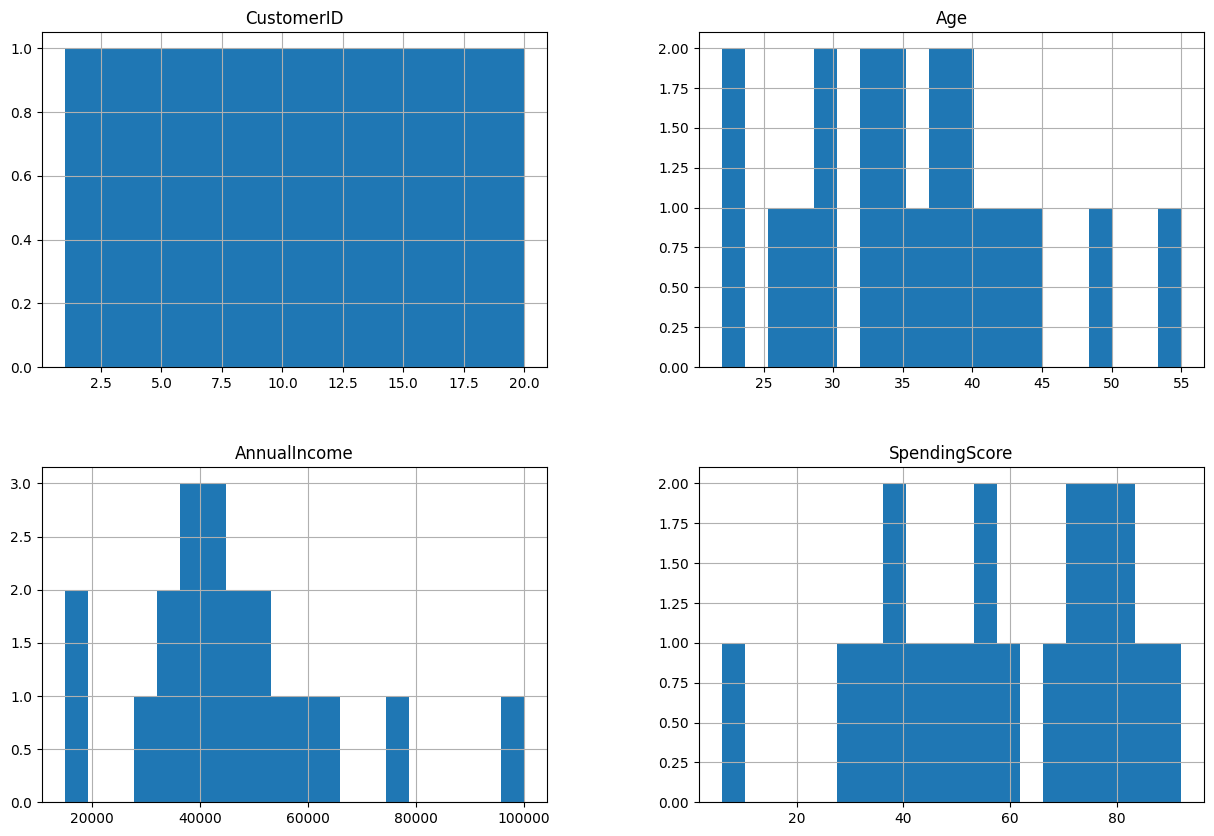

In [15]:
data.hist(bins = 20, figsize = (15, 10))
plt.show()

All numerical features were standarized to ensure they're on the same scale

        Age  AnnualIncome  SpendingScore
0 -1.658204     -1.641181      -0.894674
1 -0.096128     -0.300347       1.032316
2 -1.177565     -0.836681       0.848794
3  0.504671      0.235987      -0.848794
4  2.307066      2.917656      -2.408738


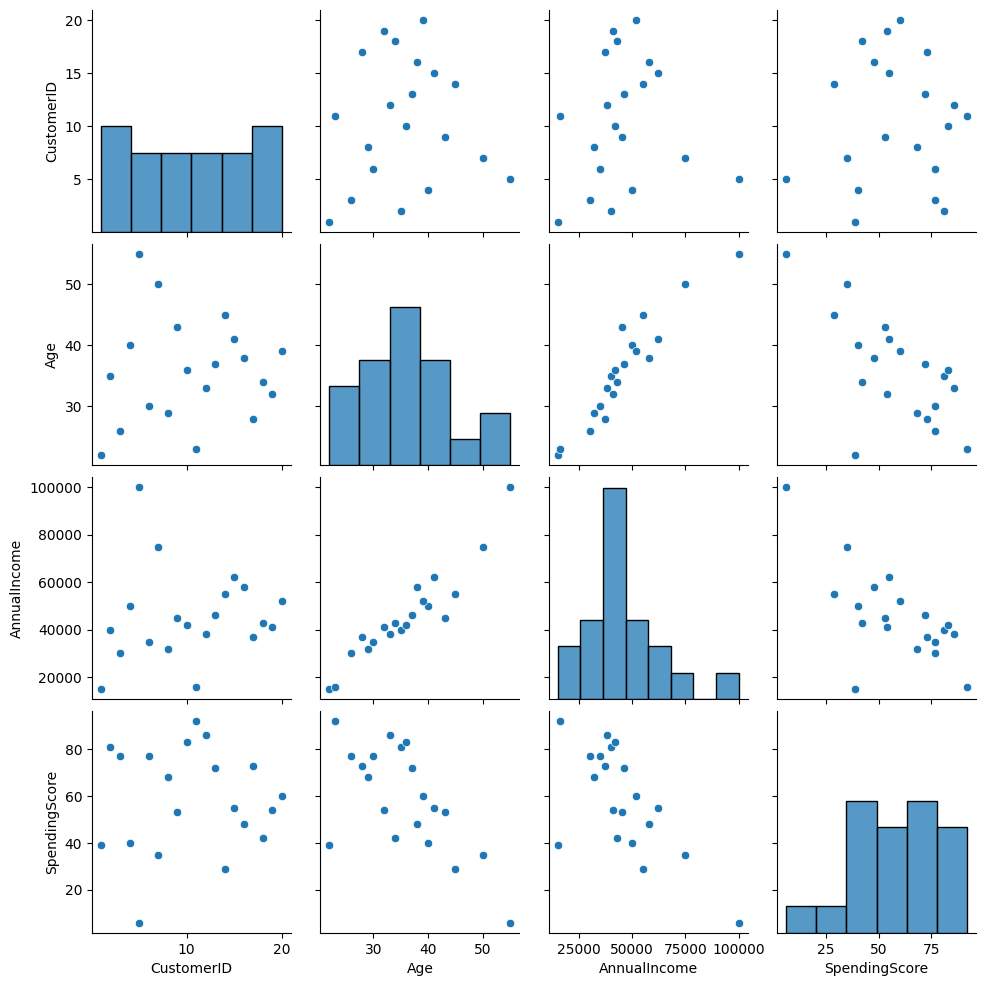

In [23]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['Age', 'AnnualIncome', 'SpendingScore']])
data_scaled = pd.DataFrame(data_scaled, columns=['Age', 'AnnualIncome', 'SpendingScore'])
print(data_scaled.head())
sns.pairplot(data)
plt.show()

Emplimenting K-means clustering algorithm

To select the best value for k, i used the elbow method. This involved the inertia for different values of k and plotting them

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


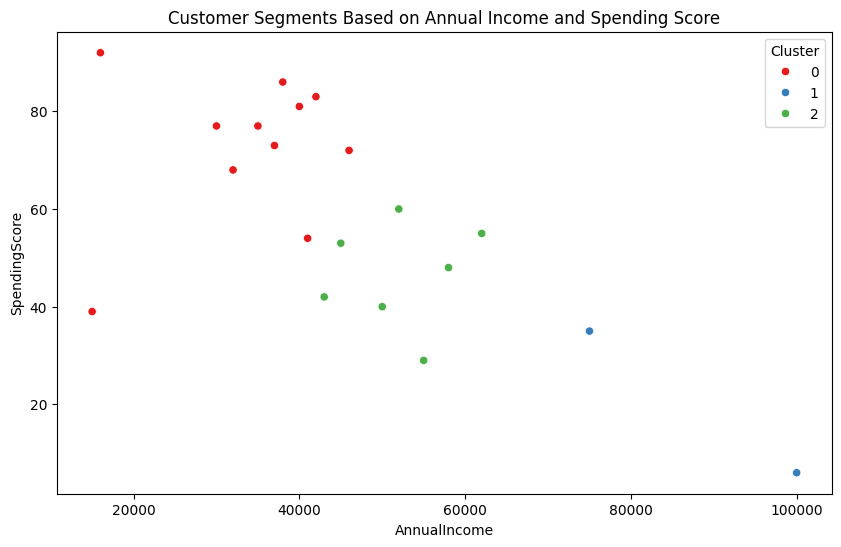

In [42]:
kmeans = KMeans(n_clusters = 3, random_state = 42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='AnnualIncome', y='SpendingScore', hue='Cluster', data=data, palette='Set1')
plt.title('Customer Segments Based on Annual Income and Spending Score')
plt.show()

The "elbow" for the curve was observed at k = 3, where the rate if inertia decrease slowed.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

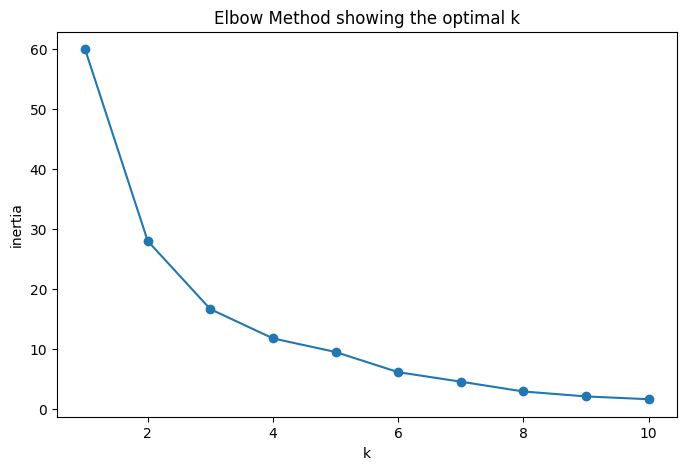

In [36]:
inertia = []
K = range(1, 11)

for k in K:
  kmeans = KMeans(n_clusters = k)
  kmeans.fit(data_scaled)
  inertia.append(kmeans.inertia_)

plt.figure(figsize = (8, 5))
plt.plot(K, inertia, marker='o')
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Elbow Method showing the optimal k')
plt.show()

In [37]:
for k in range(2, 6):
 kmeans = KMeans(n_clusters = k, random_state = 42)
 clusters = kmeans.fit_predict(data_scaled)
 silhouette_avg = silhouette_score(data_scaled, clusters)
 print(f'For k={k}, the silhouette score is {silhouette_avg:.3f}')

For k=2, the silhouette score is 0.431
For k=3, the silhouette score is 0.396
For k=4, the silhouette score is 0.402
For k=5, the silhouette score is 0.350


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [38]:
 optimal_k = 3
 kmeans = KMeans(n_clusters = optimal_k, random_state = 42)
 data['OptimalCluster'] = kmeans.fit_predict(data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Visualizing the optimal cluster

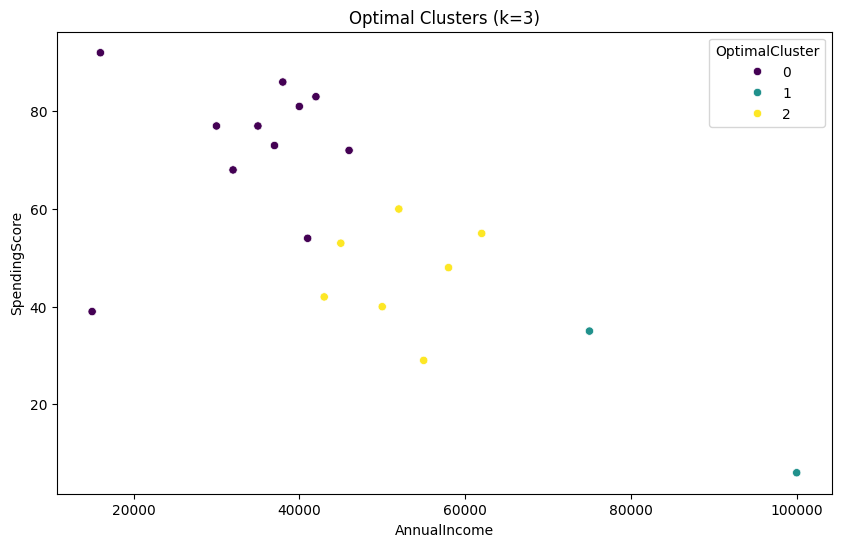

In [39]:
 plt.figure(figsize=(10, 6))
 sns.scatterplot(x = 'AnnualIncome', y = 'SpendingScore', hue = 'OptimalCluster', data = data, palette = 'viridis')
 plt.title(f'Optimal Clusters (k={optimal_k})')
 plt.show()

Cluster analysis by averaging the features for each cluster

In [41]:
 cluster_summary = data.groupby('OptimalCluster').mean()
 print(cluster_summary)

                CustomerID        Age  AnnualIncome  SpendingScore  Cluster
OptimalCluster                                                             
0                 9.272727  30.090909  33818.181818      72.909091      0.0
1                 6.000000  52.500000  87500.000000      20.500000      1.0
2                13.714286  40.000000  52142.857143      46.714286      2.0
